Global Stiffnes Matrix 
 [[ 1.05466667e+09  0.00000000e+00  0.00000000e+00 -1.05000000e+09
   0.00000000e+00  0.00000000e+00 -4.66666667e+06  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.40196875e+09  3.93750000e+06  0.00000000e+00
  -1.96875000e+06  3.93750000e+06  0.00000000e+00 -1.40000000e+09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.93750000e+06  1.05000000e+07  0.00000000e+00
  -3.93750000e+06  5.25000000e+06  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.05000000e+09  0.00000000e+00  0.00000000e+00  1.05466667e+09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -4.66666667e+06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.96875000e+06 -3.93750000e+06  0.00000000e+00
   1.40196875e+09 -3.93750000e+06  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.40000000e+

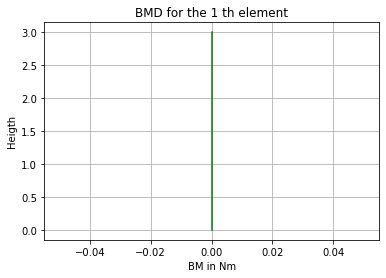

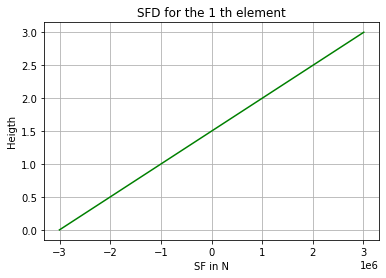

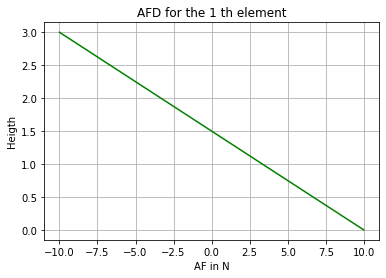

Member Force
 [-1.00000000e+01 -2.99334812e+06  0.00000000e+00  1.00000000e+01
  2.99334812e+06  0.00000000e+00]
Member Displacement
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.14285714e-06
 2.13810580e-03 0.00000000e+00]


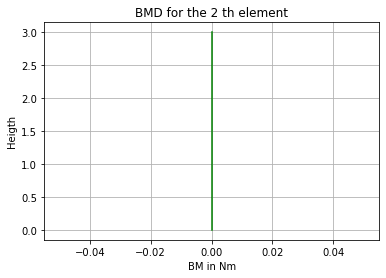

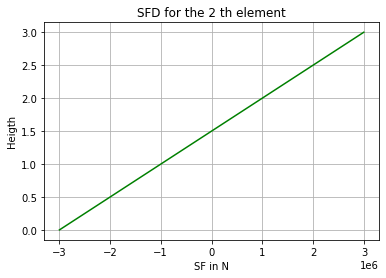

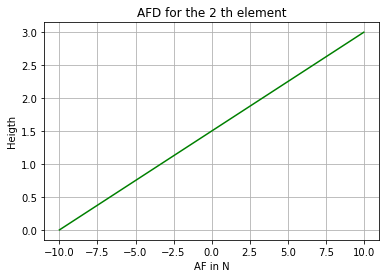

Member Force
 [-9.97782705e+03  3.00000000e+03  1.81898940e-12  9.97782705e+03
 -3.00000000e+03  1.20000000e+04]
Member Displacement
 [-2.14760849e-03 -2.14285714e-06 -7.60833333e-04 -2.13810580e-03
  2.14285714e-06  1.52488095e-03]


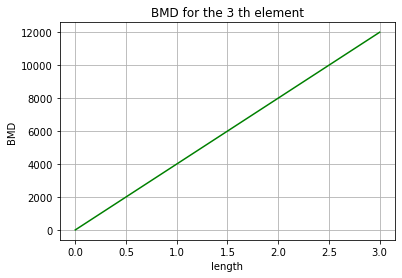

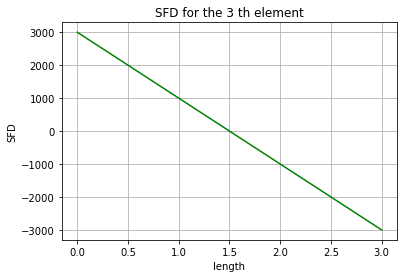

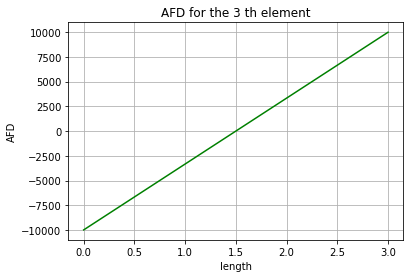

In [25]:
import numpy as np
import matplotlib.pylib as plt
E=210e9
I=5e-5
A=0.02
H=3
B=4
P=-20000.0
M=12000
KTS=np.zeros((12,12))
association=np.array([(7,8,9,1,2,3),(10,11,12,4,5,6),(1,2,3,4,5,6)])
P_mat=np.zeros(6)
P_mat[0]=P
P_mat[5]=M
P_mat=np.transpose(P_mat)
Ux=np.zeros(6)
Ux=np.transpose(Ux)
u=np.zeros(6)
for i in range(2):
    l=H
    a=12*E*I/(l**3)
    b=6*E*I/(l**2)
    c=4*E*I/l
    d=2*E*I/l
    e=A*E/l
    Ke=np.array([(e,0,0,-e,0,0),(0,a,b,0,-a,b),(0,b , c ,0, -b ,d),(-e,0,0,e,0,0),(0,-a, -b,0, a, -b),(0,b, d,0, -b, c)])
    T=np.zeros((6,6))
    T[0,1]=1
    T[1,0]=-1
    T[3,4]=1
    T[4,3]=-1
    T_t=np.transpose(T)
    Kgcol=T_t@Ke@T
    for j in range(6):
        for k in range(6):
            KTS[association[i,j]-1,association[i,k]-1]= KTS[association[i,j]-1,association[i,k]-1]+Kgcol[j,k]
l=B
a=12*E*I/(l**3)
b=6*E*I/(l**2)
c=4*E*I/l
d=2*E*I/l
e=A*E/l
Kgbeam=np.array([(e,0,0,-e,0,0),(0,a,b,0,-a,b),(0,b , c ,0, -b ,d),(-e,0,0,e,0,0),(0,-a, -b,0, a, -b),(0,b, d,0, -b, c)])
KTS[0:6,0:6]=KTS[0:6,0:6]+Kgbeam
Kpp=KTS[0:6,0:6]
Kpx=KTS[0:6,6:12]
Kxp=KTS[6:12,0:6]
Kxx=KTS[6:12,6:12]
print('Global Stiffnes Matrix \n',KTS)
Kpp_inverse=np.linalg.inv(Kpp)
print(Kpp_inverse.shape)
print(Kpp_inverse.shape)
Up=Kpp_inverse@P_mat
X=Kxp@Up
Displacement=np.concatenate((Up, Ux), axis=0)
Force=np.concatenate((P_mat, X), axis=0)
print('Force Matrix \n',Force)
print('Displacement Matrix \n',Displacement)
for i in range (3):
    for j in range(6):
        u[j]=Displacement[association[i,j]-1]
    if i<2 :
        u=T@u
        f=Kgcol@u
        print('Member Force\n',f)
        print('Member Displacement\n',u)
        l=H
        x= [0,l]
        y= [f[2], f[5]]
        plt.plot(y,x, '-g', label=r'BMD')
        plt.xlabel('BM in Nm')
        plt.ylabel('Heigth')
        plt.title("BMD for the %i th element"%(i+1))
        plt.grid(True)
        plt.show()
        x = [0,l]
        y =  [f[1],f[4]]
        plt.plot(y,x, '-g', label=r'SFD')
        plt.xlabel('SF in N')
        plt.ylabel('Heigth')
        plt.title("SFD for the %i th element"%(i+1))
        plt.grid(True)
        plt.show()
        x = [0,l]
        y =  [f[0],f[3]]
        plt.plot(y,x, '-g', label=r'SFD')
        plt.xlabel('AF in N')
        plt.ylabel('Heigth')
        plt.title("AFD for the %i th element"%(i+1))
        plt.grid(True)
        plt.show()

    else:
        f=Kgbeam@u
        print('Member Force\n',f)
        print('Member Displacement\n',u)
        x= [0,l]
        y= [f[2], f[5]]
        plt.plot(x, y, '-g', label=r'BMD')
        plt.xlabel('length')
        plt.ylabel('BMD')
        plt.title("BMD for the %i th element"%(i+1))
        plt.grid(True)
        plt.show()
        x = [0,l]
        y =  [f[1],f[4]]
        plt.plot(x, y, '-g', label=r'SFD')
        plt.xlabel('length')
        plt.ylabel('SFD')
        plt.title("SFD for the %i th element"%(i+1))
        plt.grid(True)
        plt.show()
        x = [0,l]
        y =  [f[0],f[3]]
        plt.plot(x, y, '-g', label=r'SFD')
        plt.xlabel('length')
        plt.ylabel('AFD')
        plt.title("AFD for the %i th element"%(i+1))
        plt.grid(True)
        plt.show()

